# Anatomie einer Figur

Diese Figur zeigt den Namen mehrerer Matplotlib-Elemente, aus denen eine Figur besteht

> Mehr Infos: https://matplotlib.org/stable/gallery/index.html

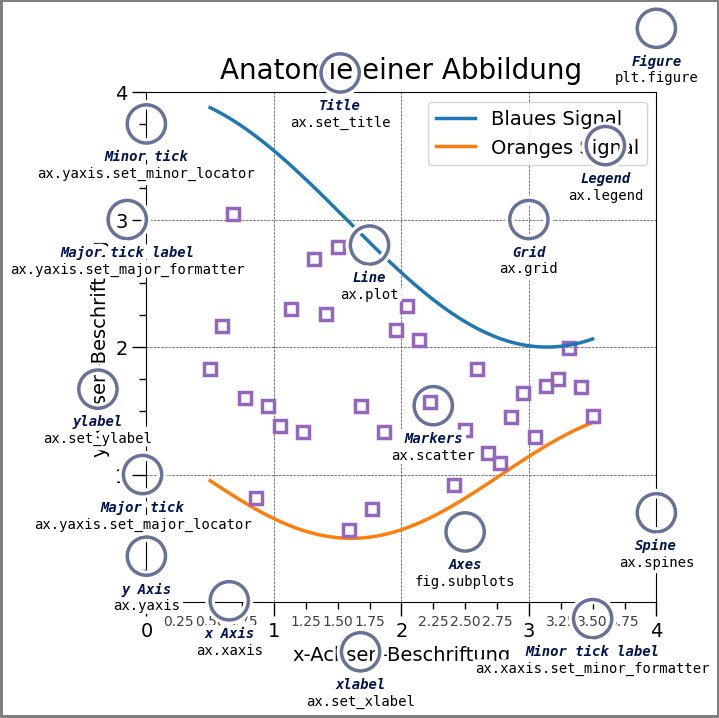

In [24]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle
from matplotlib.patheffects import withStroke
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

# Definiere die Farbe "royal_blue" in RGB
royal_blue = [0, 20/256, 82/256]

# Erstelle die Figur

np.random.seed(19680801)

# Erzeuge Daten für X und zwei Y-Kurven
X = np.linspace(0.5, 3.5, 100)
Y1 = 3 + np.cos(X)  # Erste Kurve
Y2 = 1 + np.cos(1 + X / 0.75) / 2  # Zweite Kurve
Y3 = np.random.uniform(Y1, Y2, len(X))  # Zufällige Werte zwischen Y1 und Y2

# Erstelle die Figur mit Größe 7.5x7.5
fig = plt.figure(figsize=(7.5, 7.5))
ax = fig.add_axes([0.2, 0.17, 0.68, 0.7], aspect=1)

# Setze die Ticks auf der x- und y-Achse
ax.xaxis.set_major_locator(MultipleLocator(1.000))  # Haupt-Ticks auf der x-Achse alle 1
ax.xaxis.set_minor_locator(AutoMinorLocator(4))  # Unter-Ticks auf der x-Achse
ax.yaxis.set_major_locator(MultipleLocator(1.000))  # Haupt-Ticks auf der y-Achse alle 1
ax.yaxis.set_minor_locator(AutoMinorLocator(4))  # Unter-Ticks auf der y-Achse
ax.xaxis.set_minor_formatter("{x:.2f}")  # Format der Unter-Ticks auf der x-Achse

# Setze die Achsenbegrenzungen
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

# Setze die Aussehen der Ticks
ax.tick_params(which='major', width=1.0, length=10, labelsize=14)
ax.tick_params(which='minor', width=1.0, length=5, labelsize=10, labelcolor='0.25')

# Setze das Raster
ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

# Zeichne die Kurven und die zufälligen Punkte
ax.plot(X, Y1, c='C0', lw=2.5, label="Blaues Signal", zorder=10)
ax.plot(X, Y2, c='C1', lw=2.5, label="Oranges Signal")
ax.plot(X[::3], Y3[::3], linewidth=0, markersize=9,
        marker='s', markerfacecolor='none', markeredgecolor='C4',
        markeredgewidth=2.5)

# Setze Titel und Achsenbeschriftungen
ax.set_title("Anatomie einer Abbildung", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("x-Achsen-Beschriftung", fontsize=14)
ax.set_ylabel("y-Achsen-Beschriftung", fontsize=14)
ax.legend(loc="upper right", fontsize=14)


# Beschriftung der Elemente in der Abbildung

def annotate(x, y, text, code):
    # Erstelle einen Kreis als Marker
    c = Circle((x, y), radius=0.15, clip_on=False, zorder=10, linewidth=2.5,
               edgecolor=royal_blue + [0.6], facecolor='none',
               path_effects=[withStroke(linewidth=7, foreground='white')])
    ax.add_artist(c)

    # Verwende path_effects als Hintergrund für die Texte
    # Zeichne die path_effects und den farbigen Text separat, damit die
    # path_effects andere Texte nicht abschneiden
    for path_effects in [[withStroke(linewidth=7, foreground='white')], []]:
        color = 'white' if path_effects else royal_blue
        ax.text(x, y-0.2, text, zorder=100,
                ha='center', va='top', weight='bold', color=color,
                style='italic', fontfamily='monospace',
                path_effects=path_effects)

        color = 'white' if path_effects else 'black'
        ax.text(x, y-0.33, code, zorder=100,
                ha='center', va='top', weight='normal', color=color,
                fontfamily='monospace', fontsize='medium',
                path_effects=path_effects)


# Annotiere die verschiedenen Teile der Figur
annotate(3.5, -0.13, "Minor tick label", "ax.xaxis.set_minor_formatter")
annotate(-0.03, 1.0, "Major tick", "ax.yaxis.set_major_locator")
annotate(0.00, 3.75, "Minor tick", "ax.yaxis.set_minor_locator")
annotate(-0.15, 3.00, "Major tick label", "ax.yaxis.set_major_formatter")
annotate(1.68, -0.39, "xlabel", "ax.set_xlabel")
annotate(-0.38, 1.67, "ylabel", "ax.set_ylabel")
annotate(1.52, 4.15, "Title", "ax.set_title")
annotate(1.75, 2.80, "Line", "ax.plot")
annotate(2.25, 1.54, "Markers", "ax.scatter")
annotate(3.00, 3.00, "Grid", "ax.grid")
annotate(3.60, 3.58, "Legend", "ax.legend")
annotate(2.5, 0.55, "Axes", "fig.subplots")
annotate(4, 4.5, "Figure", "plt.figure")
annotate(0.65, 0.01, "x Axis", "ax.xaxis")
annotate(0, 0.36, "y Axis", "ax.yaxis")
annotate(4.0, 0.7, "Spine", "ax.spines")

# Zeichne einen Rahmen um die Figur
fig.patch.set(linewidth=4, edgecolor='0.5')
plt.show()


# Animated image using a precomputed list of images

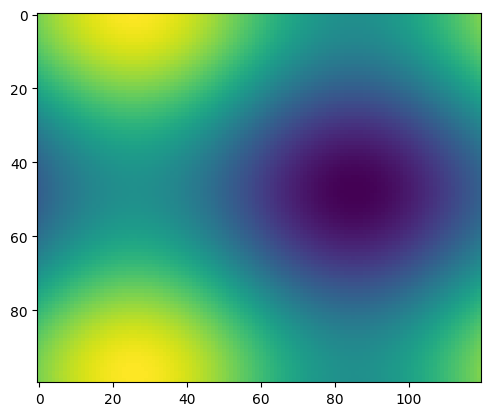

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

# Erstelle ein Diagramm
fig, ax = plt.subplots()

# Definiere die Funktion f(x, y)
def f(x, y):
    return np.sin(x) + np.cos(y)

# Erstelle Arrays für x und y
x = np.linspace(0, 2 * np.pi, 120)  # 120 Werte für x von 0 bis 2pi
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)  # 100 Werte für y von 0 bis 2pi und reshaped

# ims ist eine Liste von Listen, wobei jede Zeile eine Liste von Künstlern (Artists) ist,
# die im aktuellen Frame gezeichnet werden sollen. Hier animieren wir nur einen Künstler, das Bild (Image), in
# jedem Frame.
ims = []

# Schleife über 60 Frames
for i in range(60):
    x += np.pi / 15  # Verschiebe x in jedem Frame um pi/15
    y += np.pi / 30  # Verschiebe y in jedem Frame um pi/30
    im = ax.imshow(f(x, y), animated=True)  # Erstelle das Bild für das aktuelle Frame
    if i == 0:
        ax.imshow(f(x, y))  # Zeige das erste Bild als Initialbild
    ims.append([im])  # Füge das Bild dem ims-Array hinzu

# Erstelle die Animation mit den Bildern (frames)
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

# Zum Speichern der Animation, verwende z.B.:
#
# ani.save("movie.mp4")
#
# oder
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

# Zeige die Animation an
plt.show()


# Multiple Axes animation
This example showcases:

- how animation across multiple subplots works,

- using a figure artist in the animation.

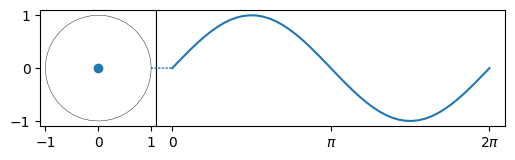

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from matplotlib.patches import ConnectionPatch

# Erstelle zwei Unterplots: links (Einheitskreis) und rechts (Sinuskurve)
fig, (axl, axr) = plt.subplots(
    ncols=2,
    sharey=True,
    figsize=(6, 2),
    gridspec_kw=dict(width_ratios=[1, 3], wspace=0),
)
axl.set_aspect(1)  # Setze das Seitenverhältnis des linken Plots (Einheitskreis) auf 1
axr.set_box_aspect(1 / 3)  # Setze das Seitenverhältnis des rechten Plots (Sinuskurve) auf 1/3
axr.yaxis.set_visible(False)  # Verstecke die y-Achse des rechten Plots
axr.xaxis.set_ticks([0, np.pi, 2 * np.pi], ["0", r"$\pi$", r"$2\pi$"])  # Setze x-Achsen-Ticks im rechten Plot

# Zeichne den Einheitskreis im linken Plot und setze den Startpunkt
x = np.linspace(0, 2 * np.pi, 50)  # Erstelle eine Serie von Werten für den Winkel
axl.plot(np.cos(x), np.sin(x), "k", lw=0.3)  # Zeichne den Einheitskreis
point, = axl.plot(0, 0, "o")  # Zeichne den Startpunkt (0,0) als Punkt auf dem Kreis

# Zeichne die vollständige Sinuskurve im rechten Plot
sine, = axr.plot(x, np.sin(x))  # Zeichne die Sinuskurve

# Zeichne eine Verbindungslinie zwischen beiden Plots
con = ConnectionPatch(
    (1, 0),
    (0, 0),
    "data",
    "data",
    axesA=axl,
    axesB=axr,
    color="C0",
    ls="dotted",  # Setze die Linie als gepunktet
)
fig.add_artist(con)  # Füge die Verbindungslinie zum Plot hinzu


# Animationsfunktion, die für jedes Frame aufgerufen wird
def animate(i):
    # Erzeuge Daten für die Sinuskurve bis zum aktuellen Winkel i
    x = np.linspace(0, i, int(i * 25 / np.pi))
    sine.set_data(x, np.sin(x))  # Aktualisiere die Sinuskurve

    # Berechne die Position des Punkts auf dem Einheitskreis
    x, y = np.cos(i), np.sin(i)
    point.set_data([x], [y])  # Aktualisiere die Position des Punkts auf dem Kreis

    # Aktualisiere die Verbindungslinie
    con.xy1 = x, y
    con.xy2 = i, y
    return point, sine, con  # Gebe die aktualisierten Elemente zurück


# Erstelle die Animation
ani = animation.FuncAnimation(
    fig,
    animate,  # Animation wird durch die Funktion 'animate' definiert
    interval=50,  # Zeitintervall zwischen den Frames (50 ms)
    blit=False,  # Blitting kann hier nicht verwendet werden, da wir mit Figurenobjekten arbeiten
    frames=np.linspace(0, 2 * np.pi, 100),  # Definiere die Frames (Winkel von 0 bis 2pi)
    repeat_delay=100,  # Verzögerung bevor die Animation wiederholt wird
)

# Zeige die Animation
plt.show()


# Create 2D bar graphs in different planes

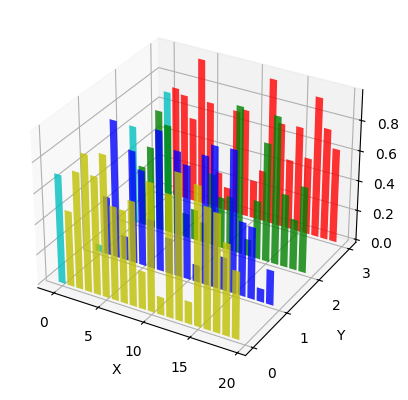

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Setze den Zufallszustand für Reproduzierbarkeit
np.random.seed(19680801)

# Erstelle eine Figur und einen 3D-Plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Definiere die Farben und y-Ticks
colors = ['r', 'g', 'b', 'y']
yticks = [3, 2, 1, 0]

# Schleife durch die Farben und y-Werte
for c, k in zip(colors, yticks):
    # Erzeuge zufällige Daten für die y=k 'Ebene'
    xs = np.arange(20)  # Erstelle 20 x-Werte
    ys = np.random.rand(20)  # Erzeuge 20 zufällige y-Werte

    # Du kannst entweder eine einzelne Farbe oder ein Array mit der gleichen Länge wie
    # xs und ys angeben. Um dies zu demonstrieren, färben wir den ersten Balken jeder Gruppe cyan.
    cs = [c] * len(xs)
    cs[0] = 'c'  # Setze die Farbe des ersten Balkens auf cyan

    # Zeichne das Balkendiagramm für xs und ys in der Ebene y=k mit 80% Transparenz
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

# Setze die Achsenbezeichner
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Setze auf der y-Achse nur die diskreten Werte, für die wir Daten haben
ax.set_yticks(yticks)

# Zeige den Plot an
plt.show()
